# Hold out method

In [53]:
import pandas as pd 
import numpy as np

from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore") # to avoid warnings

Let's import the iris data which will be our first object of study create an object data that contains the explanatory variables and an object target that contains the target variable.

In [41]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns = [a.split(" (")[0].replace(" ","_") for a in iris.feature_names])
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [42]:
target = pd.DataFrame(iris.target, columns=["species"])
target.head()

,species
0,0
1,0
2,0
3,0
4,0


Split the data between a train set and a test set

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    data,
    target
)

X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
25,5.0,3.0,1.6,0.2
137,6.4,3.1,5.5,1.8
36,5.5,3.5,1.3,0.2
40,5.0,3.5,1.3,0.3
130,7.4,2.8,6.1,1.9


Plot the distribution of the first two variables for the full data set, the train set, and the test set, do you notice any differences? what does it mean for the evaluation of our model ?

In [44]:
fig = px.density_contour(data, 'sepal_width', 'sepal_length', title = 'Full dataset')
fig.show()
fig = px.density_contour(X_train, 'sepal_width', 'sepal_length', title = 'Train set')
fig.show()
fig = px.density_contour(X_test, 'sepal_width', 'sepal_length', title = 'Test set')
fig.show()

Normalize the data (it is already very clean so there is no need to do other preprocessings)

In [45]:
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

What is the baseline (dummy model) for this model? Calculate the accuracy for this baseline model.

In [46]:
# Prédire toujours la catégorie la plus fréquente
baseline_pred = y_train.value_counts().index[0]  # Catégorie la plus fréquente

# Calcul du score du modèle baseline
baseline_accuracy = (target == baseline_pred).mean()

# Affichage du score
print(f"The general score for the baseline model is: {baseline_accuracy:}")

The general score for the baseline model is: species    0.333333
dtype: float64


Create an instance of a SVM model with a linear kernel, calculate the resubstitution score and hold out score for this model. What can you say about the bias for each of these evaluation metrics?

In [47]:
# Initialisation et entraînement du modèle
svc = SVC(kernel="linear")
svc.fit(X_train_norm, y_train)

# Calcul des scores
resubstitution_score = svc.score(X_train_norm, y_train)  # Score sur l'ensemble d'entraînement
holdout_score = svc.score(X_test_norm, y_test)  # Score sur l'ensemble de test

# Affichage des résultats
print(f"The resubstitution score for the SVC linear model is: {resubstitution_score:.4f}")
print(f"The hold-out score for the SVC linear model is: {holdout_score:.4f}")

The resubstitution score for the SVC linear model is: 0.9732
The hold-out score for the SVC linear model is: 1.0000


Look at the distribution of the target variable in the full dataset, the train set and the test set. Are they identically distributed?

In [48]:
# Calcul des distributions pour le jeu de données complet, d'entraînement et de test
full_distribution = target.value_counts() / len(target)
train_distribution = y_train.value_counts() / len(y_train)
test_distribution = y_test.value_counts() / len(y_test)

# Affichage des résultats avec f-strings
print(f"The distribution for the target on the full dataset is:\n{full_distribution}")
print(f"\nThe distribution for the target on the train set is:\n{train_distribution}")
print(f"\nThe distribution for the target on the test set is:\n{test_distribution}")

The distribution for the target on the full dataset is:
species
0          0.333333
1          0.333333
2          0.333333
Name: count, dtype: float64

The distribution for the target on the train set is:
species
2          0.357143
0          0.321429
1          0.321429
Name: count, dtype: float64

The distribution for the target on the test set is:
species
0          0.368421
1          0.368421
2          0.263158
Name: count, dtype: float64


Perform a new train test split and this time make sure that the target variable's distribution is preserved.

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    data,
    target,
    stratify=target
)

sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

# Calcul des distributions pour le jeu de données complet, d'entraînement et de test
full_distribution = target.value_counts() / len(target)
train_distribution = y_train.value_counts() / len(y_train)
test_distribution = y_test.value_counts() / len(y_test)

# Affichage des résultats avec f-strings
print(f"The distribution for the target on the full dataset is:\n{full_distribution}")
print(f"\nThe distribution for the target on the train set is:\n{train_distribution}")
print(f"\nThe distribution for the target on the test set is:\n{test_distribution}")

The distribution for the target on the full dataset is:
species
0          0.333333
1          0.333333
2          0.333333
Name: count, dtype: float64

The distribution for the target on the train set is:
species
0          0.339286
1          0.330357
2          0.330357
Name: count, dtype: float64

The distribution for the target on the test set is:
species
1          0.342105
2          0.342105
0          0.315789
Name: count, dtype: float64


What was the influence of this operation on the distribution of the explanatory variables?

In [50]:
fig = px.density_contour(data, 'sepal_width', 'sepal_length', title = 'Full dataset')
fig.show()
fig = px.density_contour(X_train, 'sepal_width', 'sepal_length', title = 'Train set')
fig.show()
fig = px.density_contour(X_test, 'sepal_width', 'sepal_length', title = 'Test set')
fig.show()

Calculate the new resubstitution score and holdout score for the new stratified split. What is the influence of stratifying data on the bias of each evaluation metric?

In [52]:
# Initialisation et entraînement du modèle
svc = SVC(kernel="linear")
svc.fit(X_train_norm, y_train)

# Calcul des scores
resubstitution_score = svc.score(X_train_norm, y_train)  # Score sur l'ensemble d'entraînement
holdout_score = svc.score(X_test_norm, y_test)  # Score sur l'ensemble de test

# Affichage des résultats
print(f"The resubstitution score for the SVC linear model is: {resubstitution_score:.4f}")
print(f"The hold-out score for the SVC linear model is: {holdout_score:.4f}")

The resubstitution score for the SVC linear model is: 0.9821
The hold-out score for the SVC linear model is: 0.9474


Create a loop that will repeat 100 times the hold out method for the non-stratified and the stratified splits respectively, then calculate the average score in both cases, the standard deviation and the 95% confidence intervals. Plot the resusbstitution and hold out score distribution for both cases, what can you conclude ?

Stratified Split Results:
Resubstitution (Stratified):
  - Mean: 0.9764
  - Standard Deviation: 0.0095
  - 95% Confidence Interval: [0.9583, 0.9917]

Hold-out (Stratified):
  - Mean: 0.9650
  - Standard Deviation: 0.0307
  - 95% Confidence Interval: [0.9000, 1.0000]

Non-Stratified Split Results:
Resubstitution (Non-Stratified):
  - Mean: 0.9756
  - Standard Deviation: 0.0084
  - 95% Confidence Interval: [0.9583, 0.9917]

Hold-out (Non-Stratified):
  - Mean: 0.9617
  - Standard Deviation: 0.0318
  - 95% Confidence Interval: [0.9000, 1.0000]



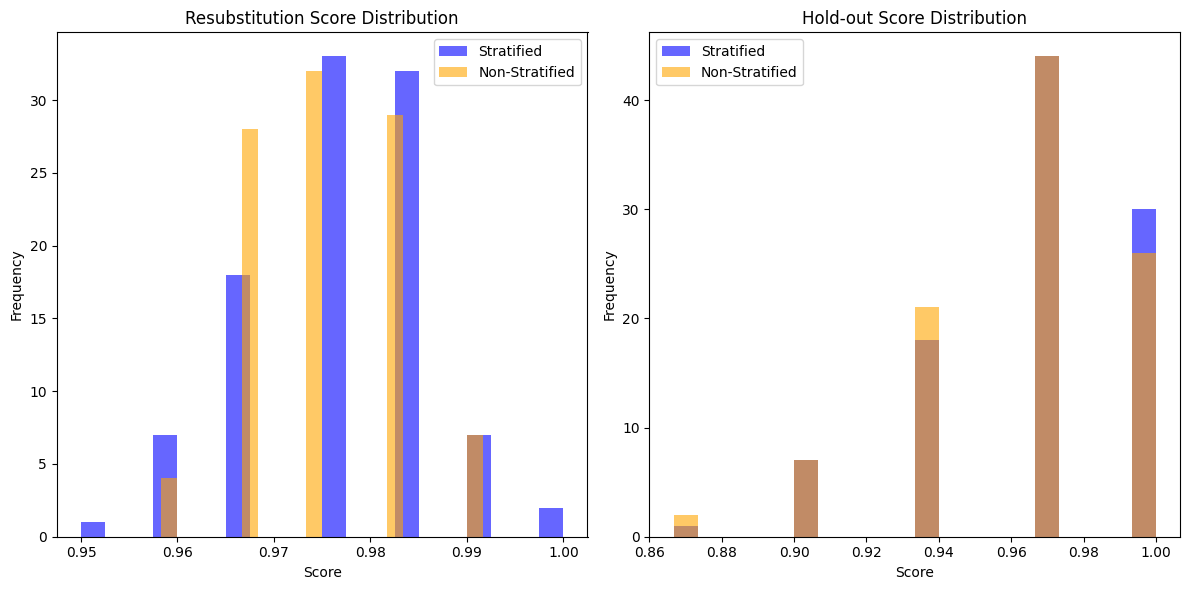

In [54]:
# Initialize score lists
re_score_stratify = [] # scores de resubstitution pour les splits stratifiés.
ho_score_stratify = [] # scores de hold-out pour les splits stratifiés.
re_score_non_stratify = [] # scores de resubstitution (accuracy sur l’ensemble d’entraînement) pour les splits non stratifiés.
ho_score_non_stratify = [] # scores de hold-out (accuracy sur l’ensemble de test) pour les splits non stratifiés

# Stratified split
for _ in range(100): # Effectue 100 itérations # "_" est utilisé comme variable de boucle lorsqu’on n’a pas besoin de la valeur de l’itération.
    X_train, X_test, y_train, y_test = train_test_split(data, target, stratify=target, test_size=0.2)
    sc = StandardScaler()
    X_train_norm = sc.fit_transform(X_train)
    X_test_norm = sc.transform(X_test)

    svc = SVC(kernel="linear")
    svc.fit(X_train_norm, y_train)

    re_score_stratify.append(svc.score(X_train_norm, y_train))
    ho_score_stratify.append(svc.score(X_test_norm, y_test))

# Non-stratified split
for _ in range(100):
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
    sc = StandardScaler()
    X_train_norm = sc.fit_transform(X_train)
    X_test_norm = sc.transform(X_test)

    svc = SVC(kernel="linear")
    svc.fit(X_train_norm, y_train)

    re_score_non_stratify.append(svc.score(X_train_norm, y_train))
    ho_score_non_stratify.append(svc.score(X_test_norm, y_test))

# Helper function to calculate statistics and confidence intervals - calculer des statistiques descriptives pour une liste de scores et d’afficher les résultats sous une forme lisible.
def calculate_stats(scores, name):
    mean = np.mean(scores)
    std_dev = np.std(scores)
    ci_lower = np.quantile(scores, 0.025) # borne inférieure de l’intervalle de confiance à 95 %
    ci_upper = np.quantile(scores, 0.975) # borne supérieure de l’intervalle de confiance à 95 %
    print(f"{name}:\n"
          f"  - Mean: {mean:.4f}\n"
          f"  - Standard Deviation: {std_dev:.4f}\n"
          f"  - 95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]\n")
    return mean, std_dev, ci_lower, ci_upper

# Calculate stats for both cases
print("Stratified Split Results:")
re_mean_stratify, re_std_stratify, re_ci_low_stratify, re_ci_high_stratify = calculate_stats(re_score_stratify, "Resubstitution (Stratified)")
ho_mean_stratify, ho_std_stratify, ho_ci_low_stratify, ho_ci_high_stratify = calculate_stats(ho_score_stratify, "Hold-out (Stratified)")

print("Non-Stratified Split Results:")
re_mean_non_stratify, re_std_non_stratify, re_ci_low_non_stratify, re_ci_high_non_stratify = calculate_stats(re_score_non_stratify, "Resubstitution (Non-Stratified)")
ho_mean_non_stratify, ho_std_non_stratify, ho_ci_low_non_stratify, ho_ci_high_non_stratify = calculate_stats(ho_score_non_stratify, "Hold-out (Non-Stratified)")

# Plot score distributions
plt.figure(figsize=(12, 6))

# Resubstitution scores
plt.subplot(1, 2, 1)
plt.hist(re_score_stratify, alpha=0.6, bins=20, label="Stratified", color="blue")
plt.hist(re_score_non_stratify, alpha=0.6, bins=20, label="Non-Stratified", color="orange")
plt.title("Resubstitution Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.legend()

# Hold-out scores
plt.subplot(1, 2, 2)
plt.hist(ho_score_stratify, alpha=0.6, bins=20, label="Stratified", color="blue")
plt.hist(ho_score_non_stratify, alpha=0.6, bins=20, label="Non-Stratified", color="orange")
plt.title("Hold-out Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()